# A

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
new_path = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data"
os.chdir(new_path)
def read_proportion(suffix,Dean):
    name = ['1', '2', '3', '4', '5']
    merged_dict = {}
    for i in name:
        ERGO_AE = pd.read_csv(f"./ERGO/result/pair50/seen/{Dean}/{i}_{suffix}ae_all_result.csv")
        ERGO_lstm = pd.read_csv(f"./ERGO/result/pair50/seen/{Dean}/{i}_{suffix}lstm_all_result.csv")
        NetTCR = pd.read_csv(f"./NetTCR/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        DLpTCR_CNN = pd.read_csv(f"./DLpTCR/result/pair50/seen/{Dean}/{i}_{suffix}CNN_pca20_all_result.csv")
        DLpTCR_FULL = pd.read_csv(f"./DLpTCR/result/pair50/seen/{Dean}/{i}_{suffix}FULL_pca18_all_result.csv")
        DLpTCR_RESNET = pd.read_csv(f"./DLpTCR/result/pair50/seen/{Dean}/{i}_{suffix}RESNET_pca10_all_result.csv")
        AttnTAP = pd.read_csv(f"./AttnTAP/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        ATM_TCR = pd.read_csv(f"./ATM_TCR/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        TEINet = pd.read_csv(f"./TEINet/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        epiTCR = pd.read_csv(f"./epiTCR/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        SETE = pd.read_csv(f"./SETE/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        TEIM = pd.read_csv(f"./TEIM/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        TPBTE = pd.read_csv(f"./TPBTE/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        TCR_BERT=pd.read_csv(f"./tcr_bert/result/pair50/seen/{Dean}/{i}_{suffix}all_result.csv")
        merged = pd.DataFrame()
        dataframe_list = [ERGO_AE,ERGO_lstm, NetTCR, DLpTCR_CNN, DLpTCR_FULL, DLpTCR_RESNET, AttnTAP, ATM_TCR, TEINet, epiTCR, SETE, TEIM, TPBTE,TCR_BERT]
        dataframe_names = ['ERGO_AE', 'ERGO_lstm','NetTCR', 'DLpTCR_CNN', 'DLpTCR_FULL', 'DLpTCR_RESNET', 'AttnTAP', 'ATM_TCR', 'TEINet', 'epiTCR', 'SETE', 'TEIM', 'TPBTE','TCR_BERT']
        
        for df, df_name in zip(dataframe_list, dataframe_names):
            last_row = df.tail(1)
            merged = pd.concat([merged, last_row])
        
        merged.set_index(pd.Index(dataframe_names), inplace=True)
        merged = merged.iloc[:, 2:]
        merged_dict[f'merged{i}'] = merged
    
    merged1, merged2, merged3, merged4, merged5 = (merged_dict[f'merged{i}'] for i in name) 
    df_mean = (merged1 + merged2 + merged3 + merged4 + merged5) / 5
    df_mean = df_mean.rename(columns={'prc_auc': 'AUPRC'})
    df_mean.columns = [f'{suffix}' + col if col not in ['Model'] else col for col in df_mean.columns]
    return df_mean

import pandas as pd
import numpy as np

def process_model_data(model_name,namel,Dean,suffix):
    ant_file = "./database/benchmark_dataset/Intersection_dataset/raw_data/antigen_species.csv"
    ant = pd.read_csv(ant_file)
    name = ['1', '2', '3', '4', '5']
    merged_dict = {}
    for i in name:
        df=pd.read_csv(f"./{model_name}/result/pair50/seen/{Dean}/{i}_{suffix}.csv")
        df.rename(columns={'epitope': 'Epitope'}, inplace=True)
        df = pd.merge(df, ant, on='Epitope')
        df = df[['prc_auc', 'antigen_species']]
        df = df.set_index('antigen_species')
        df = df.groupby('antigen_species').mean()
        column_names = {'prc_auc': f'{namel}_prc_auc'}
        df = df.rename(columns=column_names)
        merged_dict[f'merged{i}'] = df

    merged1, merged2, merged3, merged4, merged5 = (merged_dict[f'merged{i}'] for i in name) 
    df_mean = (merged1 + merged2 + merged3 + merged4 + merged5) / 5
    df_mean = df_mean.reindex(sorted(df_mean.columns), axis=1)
    return df_mean


def all_models_result(ratio,Dean,AUPRC_test):
    ERGO_AE = process_model_data('ERGO','ERGO_AE',Dean, f'{ratio}ae_all_result')
    ERGO_lstm = process_model_data('ERGO','ERGO_lstm',Dean, f'{ratio}lstm_all_result')
    NetTCR = process_model_data('NetTCR', 'NetTCR',Dean,f'{ratio}all_result')
    DLpTCR_CNN = process_model_data('DLpTCR', 'DLpTCR_CNN',Dean,f'{ratio}CNN_pca20_all_result')
    DLpTCR_FULL = process_model_data('DLpTCR','DLpTCR_FULL',Dean, f'{ratio}FULL_pca18_all_result')
    DLpTCR_RESNET = process_model_data('DLpTCR','DLpTCR_RESNET',Dean, f'{ratio}RESNET_pca10_all_result')
    AttnTAP = process_model_data('AttnTAP','AttnTAP',Dean, f'{ratio}all_result')
    ATM_TCR = process_model_data('ATM_TCR','ATM_TCR', Dean,f'{ratio}all_result')
    TEINet = process_model_data('TEINet','TEINet',Dean, f'{ratio}all_result')
    epiTCR = process_model_data('epiTCR', 'epiTCR',Dean,f'{ratio}all_result')
    SETE = process_model_data('SETE','SETE',Dean,f'{ratio}all_result')
    TEIM = process_model_data('TEIM','TEIM',Dean, f'{ratio}all_result')
    TPBTE  = process_model_data('TPBTE','TPBTE',Dean, f'{ratio}all_result')
    TCR_BERT  = process_model_data('tcr_bert','TCR_BERT',Dean, f'{ratio}all_result')
    all_data = pd.concat([epiTCR, TEINet, ATM_TCR, AttnTAP,DLpTCR_RESNET,DLpTCR_FULL,DLpTCR_CNN,ERGO_AE,ERGO_lstm,SETE,NetTCR,TPBTE,TEIM,TCR_BERT], axis=1)
    selected = all_data.filter(like='prc_auc')
    selected.columns = [col.replace('_prc_auc', '') for col in selected.columns]
    selected=selected.T
    selected.index = selected.index.str.replace('_', '-', regex=False)
    selected = selected.reindex(AUPRC_test.index)
    selected = selected.iloc[::-1]
    return selected

def plot_scatter(ax, selected_data, title, show_yticks=True):
    colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    norm = plt.Normalize(selected_data.min().min(), selected_data.max().max())
    for i, column in enumerate(selected_data.columns):
        x = np.full(selected_data.shape[0], i)
        y = np.arange(selected_data.shape[0])
        sizes = 100 * selected_data[column] / selected_data.max().max()
        color = cmap(norm(selected_data[column]))
        ax.scatter(x, y, s=sizes, color=color)

    ax.set_xticks(np.arange(selected_data.columns.size))
    ax.set_xticklabels(selected_data.columns, rotation=45, ha='right', va='top')
    #ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    ax.set_title(title, fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)

    if show_yticks:
        ax.set_yticks(np.arange(selected_data.shape[0]))
        ax.set_yticklabels(selected_data.index)
    else:
        ax.set_yticks([])

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def Drawing(Dean,fig_name):
    suffixes = ['1_1', '1_2', '1_4', '1_6', '1_8']
    all_data = pd.concat([read_proportion(suffix,Dean) for suffix in suffixes], axis=1)
    all_data.columns = [c.replace('_', '-') for c in all_data.columns]
    all_data = all_data.sort_values(by='1-1AUPRC', ascending=False)
    all_data.index = all_data.index.str.replace('_', '-', regex=False)

    AUPRC_test = all_data[['1-1AUPRC', '1-2AUPRC', '1-4AUPRC', '1-6AUPRC', '1-8AUPRC']]
    AUPRC_test.columns = [c.replace('AUPRC', '') if 'AUPRC' in c else c for c in AUPRC_test.columns]
    AUPRC_test.columns = [c.replace('-', ':') if '-' in c else c for c in AUPRC_test.columns]
    
    AUPRC_test['Mean'] = AUPRC_test.mean(axis=1)
    AUPRC_test = AUPRC_test.sort_values(by='Mean', ascending=False)
    AUPRC_test = AUPRC_test.drop(columns=['Mean'])

    selected_1_1=all_models_result('1_1',Dean,AUPRC_test)
    selected_1_2=all_models_result('1_2',Dean,AUPRC_test)
    selected_1_4=all_models_result('1_4',Dean,AUPRC_test)
    selected_1_6=all_models_result('1_6',Dean,AUPRC_test)
    selected_1_8=all_models_result('1_8',Dean,AUPRC_test)

    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['xtick.labelsize'] = 14  
    plt.rcParams['ytick.labelsize'] = 12  
    colors = sns.color_palette("RdYlBu", n_colors=256)[::-1]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    fig, axs = plt.subplots(1, 6, figsize=(15, 4.4), gridspec_kw={'width_ratios': [2, 2, 2, 2, 2, 2.2]})  

    plot_scatter(axs[0], selected_1_1, 'P:N=1:1', show_yticks=True)
    plot_scatter(axs[1], selected_1_2, 'P:N=1:2', show_yticks=False)
    plot_scatter(axs[2], selected_1_4, 'P:N=1:4', show_yticks=False)
    plot_scatter(axs[3], selected_1_6, 'P:N=1:6', show_yticks=False)
    plot_scatter(axs[4], selected_1_8, 'P:N=1:8', show_yticks=False) 
    sns.heatmap(AUPRC_test, cmap=cmap, vmin=0,annot=True, fmt=".2f",  vmax=AUPRC_test.max().max(), ax=axs[5], yticklabels=False)
    axs[5].set_xticks(np.arange(0.5, len(AUPRC_test.columns)))
    axs[5].set_xticklabels(AUPRC_test.columns, ha='center')
    axs[5].set_title('AUPRC', fontsize=10)
    plt.subplots_adjust(wspace=0.05)  
    plt.savefig(f"./All_results/fig/fig5/{fig_name}.pdf", bbox_inches='tight')
    plt.show()

# A

/tmp/ipykernel_37551/3900221636.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUPRC_test['Mean'] = AUPRC_test.mean(axis=1)


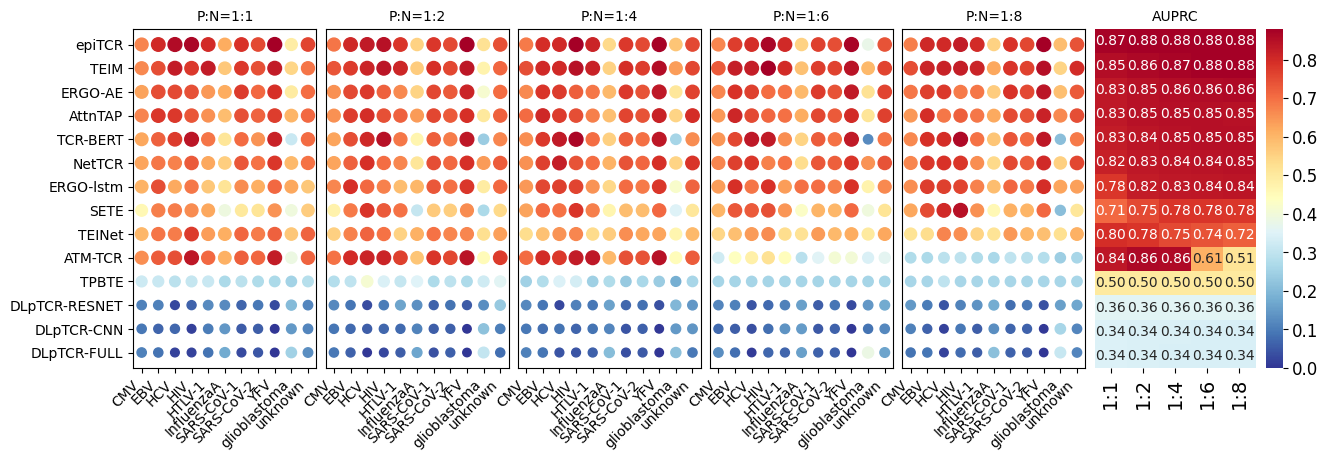

In [42]:
Drawing('test/healthy','A_rates_test_healthy')

# B

/tmp/ipykernel_29838/3900221636.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AUPRC_test['Mean'] = AUPRC_test.mean(axis=1)


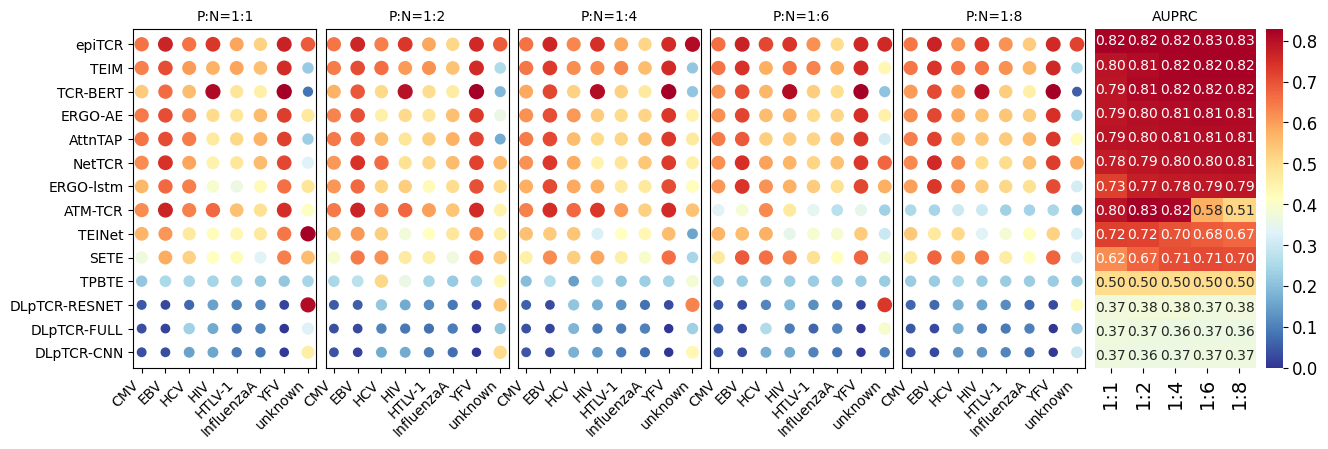

In [12]:
Drawing('validation/healthy','B_rates_validation_healthy')

# C

In [35]:
import pandas as pd
import numpy as np
import os
new_path = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data"
os.chdir(new_path)
def read_data(Dean, ratio):
    name = ['1', '2', '3', '4', '5']
    dataframe_dict = {}
    merged_dict = {}
    for i in name:
        dataframe_dict['ERGO_AE'] = pd.read_csv(f"./ERGO/result/pair50/unseen/{Dean}/{i}_{ratio}ae_all_result.csv")
        dataframe_dict['ERGO_lstm'] = pd.read_csv(f"./ERGO/result/pair50/unseen/{Dean}/{i}_{ratio}lstm_all_result.csv")
        dataframe_dict['NetTCR'] = pd.read_csv(f"./NetTCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['DLpTCR_CNN'] = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}CNN_pca20_all_result.csv")
        dataframe_dict['DLpTCR_FULL'] = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}FULL_pca18_all_result.csv")
        dataframe_dict['DLpTCR_RESNET'] = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}RESNET_pca10_all_result.csv")
        dataframe_dict['AttnTAP'] = pd.read_csv(f"./AttnTAP/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['ATM_TCR'] = pd.read_csv(f"./ATM_TCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['TEINet'] = pd.read_csv(f"./TEINet/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['epiTCR'] = pd.read_csv(f"./epiTCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['TEIM'] = pd.read_csv(f"./TEIM/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframe_dict['TPBTE'] = pd.read_csv(f"./TPBTE/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        merged = pd.DataFrame()
        dataframe_names = ['ERGO_AE','ERGO_lstm','NetTCR', 'DLpTCR_CNN', 'DLpTCR_FULL', 'DLpTCR_RESNET', 'AttnTAP', 'ATM_TCR', 'TEINet', 'epiTCR', 'TEIM', 'TPBTE']

        for df_name in dataframe_names:
            df = dataframe_dict[df_name]
            last_row = df.tail(1)
            merged = pd.concat([merged, last_row])
        merged.set_index(pd.Index(dataframe_names), inplace=True)
        merged = merged.iloc[:, 1:]
        merged_dict[f'merged{i}'] = merged

    merged1, merged2, merged3, merged4, merged5 = (merged_dict[f'merged{i}'] for i in name)
    df_mean = (merged1 + merged2 + merged3 + merged4 + merged5) / 5
    df_mean = df_mean.sort_values(by='prc_auc', ascending=False)
    df_mean.rename(index=lambda x: x.replace('_', '-'), inplace=True)
    df_mean = df_mean.rename(columns={df_mean.columns[0]: f'{ratio}'})
    df_mean = df_mean.sort_values(by=f'{ratio}', ascending=False)
    df_mean=df_mean[['prc_auc']]
    name = ['1', '2', '3', '4', '5']
    mer_dict = {}
    for i in name:
        ERGO_AE = pd.read_csv(f"./ERGO/result/pair50/unseen/{Dean}/{i}_{ratio}ae_all_result.csv")
        ERGO_lstm = pd.read_csv(f"./ERGO/result/pair50/unseen/{Dean}/{i}_{ratio}lstm_all_result.csv")
        NetTCR = pd.read_csv(f"./NetTCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        DLpTCR_CNN = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}CNN_pca20_all_result.csv")
        DLpTCR_FULL = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}FULL_pca18_all_result.csv")
        DLpTCR_RESNET = pd.read_csv(f"./DLpTCR/result/pair50/unseen/{Dean}/{i}_{ratio}RESNET_pca10_all_result.csv")
        AttnTAP = pd.read_csv(f"./AttnTAP/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        ATM_TCR = pd.read_csv(f"./ATM_TCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        TEINet = pd.read_csv(f"./TEINet/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        epiTCR = pd.read_csv(f"./epiTCR/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        TEIM = pd.read_csv(f"./TEIM/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        TPBTE = pd.read_csv(f"./TPBTE/result/pair50/unseen/{Dean}/{i}_{ratio}all_result.csv")
        dataframes = {
            'ERGO_AE': ERGO_AE,
            'ERGO_lstm': ERGO_lstm,
            'NetTCR': NetTCR,
            'DLpTCR_CNN': DLpTCR_CNN,
            'DLpTCR_FULL': DLpTCR_FULL,
            'DLpTCR_RESNET': DLpTCR_RESNET,
            'AttnTAP': AttnTAP,
            'ATM_TCR': ATM_TCR,
            'TEINet': TEINet,
            'epiTCR': epiTCR,
            'TEIM': TEIM,
            'TPBTE': TPBTE}

        for model_name, df in dataframes.items():
            if model_name in mer_dict:
                mer_dict[model_name] = pd.concat([mer_dict[model_name], df])
            else:
                mer_dict[model_name] = df
    final_dataframes = {}
    for model_name, df in mer_dict.items():
        avg_df = df.groupby('epitope').mean().reset_index()
        avg_df = avg_df.drop(avg_df.index[-1])  
        avg_df = avg_df[['epitope', 'prc_auc']]
        avg_df = avg_df.rename(columns={'prc_auc': model_name})
        final_dataframes[model_name] = avg_df
    merged_df = None
    for model_name, df in final_dataframes.items():
        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='epitope', how='outer')
    merged_df = merged_df.set_index('epitope')
    merged_df = merged_df.T
    merged_df.rename(index=lambda x: x.replace('_', '-'), inplace=True)

    return merged_df, df_mean


In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.patches import Patch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec
from scipy.cluster.hierarchy import linkage, leaves_list
import matplotlib.colors as mcolors

def plot_healthy_heatmap(merged_healthy, antigen_unique, bbox_to_anchor,ncol, num_gaps=3, figsize=(6, 3.5), ax=None):
    merged_with_species = pd.merge(merged_healthy.T, antigen_unique, on='epitope').set_index('epitope').T
    antigen_species = merged_with_species.iloc[-1, :]
    new_columns = [f"{antigen_species[i]}-{col}" for i, col in enumerate(merged_with_species.columns)]
    merged_with_species.columns = new_columns
    merged_with_species = merged_with_species.iloc[:-1, :]

    antigen_types = pd.Series([col.split('-')[0] for col in merged_with_species.columns], index=merged_with_species.columns)
    antigen_counts = antigen_types.value_counts()
    sorted_antigen_types = antigen_counts.index.tolist()
    sorted_df = pd.DataFrame()
    for antigen in sorted_antigen_types:
        cols_to_group = merged_with_species.loc[:, antigen_types == antigen]
        if cols_to_group.dropna(axis=1, how='all').shape[1] > 1:
            linkage_matrix = linkage(cols_to_group.T.dropna(), method='average')
            order = leaves_list(linkage_matrix)
            clustered_cols = cols_to_group.iloc[:, order]
        else:
            clustered_cols = cols_to_group
        sorted_df = pd.concat([sorted_df, clustered_cols], axis=1)
        for _ in range(num_gaps):
            gap_col = pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{antigen}'])
            sorted_df = pd.concat([sorted_df, gap_col], axis=1)
    sorted_df = sorted_df.iloc[:, :-num_gaps]
    df_rearranged = sorted_df
    epitope_order = df_rearranged.columns.tolist()
    epitope_order_df = pd.DataFrame(epitope_order, columns=['epitope_order'])
    epitope_order_df = epitope_order_df[~epitope_order_df['epitope_order'].str.contains('gap')]
    epitope_order_df.reset_index(drop=True, inplace=True)

    new_columns = [col.split('-')[0] for col in df_rearranged.columns]
    df_rearranged.columns = new_columns
    fixed_color_map = {
        'Unknown': '#1f77b4',    
        'Coronavirus': '#ff7f0e', 
        'HIV': '#2ca02c',        
        'CMV': '#e377c2',         
        'Influenza': '#9467bd',   
        'EBV': '#8c564b',        
        'Tumor': '#d62728',      
        'HBV': '#7f7f7f',        
        'HTLV': '#bcbd22',       
        'HCV': '#17becf',       
        'Bacteria': '#393b79',   
        'HSV': '#637939',        
        'HPV': '#8c6d31',        
        'HEV': '#e7ba52' }


    unique_columns = df_rearranged.columns.unique()
    unique_columns = [col for col in unique_columns if 'gap' not in col]
    col_colors = []
    for col in df_rearranged.columns:
        if not col.startswith('gap'):
            rgba_color = mcolors.to_rgba(fixed_color_map.get(col, (1.0, 1.0, 1.0))) 
            col_colors.append(rgba_color)
        else:
            col_colors.append((1.0, 1.0, 1.0, 1.0)) 
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])

    colors = ["#CCE4EF", "white", "#E5ADA8"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    plt.rcParams['pdf.fonttype'] = 42
    sns.heatmap(df_rearranged.astype(float), cmap=cmap, cbar=False, ax=ax, xticklabels=False)

    divider = make_axes_locatable(ax)
    cax_above = divider.append_axes("top", size="5%", pad=0.1)
    cax_above.imshow([col_colors], aspect='auto', interpolation='nearest')
    cax_above.axis('off')
    handles = [Patch(color=fixed_color_map[key], label=key) for key in unique_columns if key in fixed_color_map]
    ax.legend(handles=handles, loc='upper center', bbox_to_anchor=bbox_to_anchor, borderaxespad=0.,
              fontsize=11, labelspacing=0.5, ncol=ncol)

    if ax is None:
        plt.show()
    return epitope_order_df


def plot_merged_heatmap(epitope_order_df, merged_patient, antigen_unique, figsize=(7, 3.5), ax=None, num_gaps=3):
    epitope_order_suffixes = epitope_order_df['epitope_order'].str.split('-', expand=True).iloc[:, -1]
    col_mapping = {col.split('-')[-1]: col for col in merged_patient.columns}
    sorted_columns = [col_mapping[suffix] for suffix in epitope_order_suffixes if suffix in col_mapping]

    merged_patient_sorted = merged_patient[sorted_columns]
    merged_with_species = pd.merge(merged_patient_sorted.T, antigen_unique, on='epitope').set_index('epitope').T
    antigen_species = merged_with_species.iloc[-1, :]
    new_columns = [f"{antigen_species[i]}-{col}" for i, col in enumerate(merged_with_species.columns)]
    merged_with_species.columns = new_columns
    merged_with_species = merged_with_species.iloc[:-1, :]
    antigen_types = pd.Series([col.split('-')[0] for col in merged_with_species.columns], index=merged_with_species.columns)
    antigen_counts = antigen_types.value_counts()
    sorted_antigen_types = antigen_counts.index.tolist()
    sorted_df = pd.DataFrame()
    for antigen in sorted_antigen_types:
        cols_to_group = merged_with_species.loc[:, antigen_types == antigen]
        clustered_cols = cols_to_group
        sorted_df = pd.concat([sorted_df, clustered_cols], axis=1)
        for _ in range(num_gaps):
            gap_col = pd.DataFrame(np.nan, index=cols_to_group.index, columns=[f'gap_{antigen}'])
            sorted_df = pd.concat([sorted_df, gap_col], axis=1)
    sorted_df = sorted_df.iloc[:, :-num_gaps]
    df_rearranged = sorted_df
    new_columns = [col.split('-')[0] for col in df_rearranged.columns]
    df_rearranged.columns = new_columns
    fixed_color_map = {
        'Unknown': '#1f77b4',    
        'Coronavirus': '#ff7f0e', 
        'HIV': '#2ca02c',        
        'CMV': '#e377c2',         
        'Influenza': '#9467bd',   
        'EBV': '#8c564b',        
        'Tumor': '#d62728',      
        'HBV': '#7f7f7f',        
        'HTLV': '#bcbd22',       
        'HCV': '#17becf',       
        'Bacteria': '#393b79',   
        'HSV': '#637939',        
        'HPV': '#8c6d31',        
        'HEV': '#e7ba52' }

    unique_columns = df_rearranged.columns.unique()
    unique_columns = [col for col in unique_columns if 'gap' not in col]

    col_colors = []
    for col in df_rearranged.columns:
        if not col.startswith('gap'):
            rgba_color = mcolors.to_rgba(fixed_color_map.get(col, (1.0, 1.0, 1.0)))  
            col_colors.append(rgba_color)
        else:
            col_colors.append((1.0, 1.0, 1.0, 1.0))  

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    colors = ["#CCE4EF", "white", "#E5ADA8"]
    plt.rcParams['pdf.fonttype'] = 42
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)
    sns.heatmap(df_rearranged.astype(float), cmap=cmap, cbar=False, ax=ax, xticklabels=False, yticklabels=False)
    divider = make_axes_locatable(ax)
    cax_above = divider.append_axes("top", size="5%", pad=0.1)
    cax_above.imshow([col_colors], aspect='auto', interpolation='nearest')
    cax_above.axis('off')

    if ax is None:
        plt.show()

def plot_all_heatmap(all_mean_df, title='AUPRC', cmap_colors=None, figsize=(6, 4), ax=None):
    if cmap_colors is None:
        cmap_colors = ["#CCE4EF", "white", "#E5ADA8"]
    cmap = LinearSegmentedColormap.from_list("custom_cmap", cmap_colors)
    norm = Normalize(vmin=0, vmax=1)
    plt.rcParams['pdf.fonttype'] = 42
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(all_mean_df,annot=True, fmt=".2f", cmap=cmap,norm=norm,linewidths=0.2, linecolor='darkgray',ax=ax)
    ax.set_xticks(np.arange(all_mean_df.columns.size) + 0.5)
    ax.set_xticklabels(['1:1', '1:2', '1:4', '1:6', '1:8'], fontsize=12, rotation=45, ha='center', va='top')
    ax.set_yticks([])
    ax.set_title(title)
    ax.set_ylabel('')
    if ax is None:
        plt.show()
           
        
def combine_plots_in_row(merged_df1_1, merged_df1_2, merged_df1_4,merged_df1_6,merged_df1_8, antigen_unique, all_mean_df,file_name_prefix,bbox_to_anchor,ncol):
    fig, axs = plt.subplots(1, 6, figsize=(17, 3.7)) 
    plt.subplots_adjust(wspace=0.08)
    plt.rcParams['pdf.fonttype'] = 42
    epitope_order_df = plot_healthy_heatmap(merged_df1_1, antigen_unique,bbox_to_anchor=bbox_to_anchor,ncol=ncol, num_gaps=3, figsize=(6, 3.5), ax=axs[0])
    plot_merged_heatmap(epitope_order_df, merged_df1_2, antigen_unique, figsize=(7, 3.5), ax=axs[1])
    plot_merged_heatmap(epitope_order_df, merged_df1_4, antigen_unique, figsize=(7, 3.5), ax=axs[2])
    plot_merged_heatmap(epitope_order_df, merged_df1_6, antigen_unique, figsize=(7, 3.5), ax=axs[3])
    plot_merged_heatmap(epitope_order_df, merged_df1_8, antigen_unique, figsize=(7, 3.5), ax=axs[4])
    plot_all_heatmap(all_mean_df, title='AUPRC', cmap_colors=None, figsize=(6, 4), ax=axs[5])
    axs[5].set_aspect('auto')
    plt.savefig(f"./All_results/fig/fig5/{file_name_prefix}.pdf", bbox_inches='tight')
    plt.show()  


def Ratios(data_path):
    merged_df1_1, df_mean1_1 = read_data(data_path, '1_1')
    merged_df1_2, df_mean1_2 = read_data(data_path, '1_2')
    merged_df1_4, df_mean1_4 = read_data(data_path, '1_4')
    merged_df1_6, df_mean1_6 = read_data(data_path, '1_6')
    merged_df1_8, df_mean1_8 = read_data(data_path, '1_8')

    dataframes = [df_mean1_1, df_mean1_2, df_mean1_4, df_mean1_6, df_mean1_8]
    all_mean_df = pd.concat(dataframes, axis=1, join='inner')
    all_mean_df['Mean'] = all_mean_df.mean(axis=1)
    all_mean_df = all_mean_df.sort_values(by='Mean', ascending=False)
    all_mean_df = all_mean_df.drop(columns=['Mean'])

    merged_df1_1 = merged_df1_1.reindex(all_mean_df.index)
    merged_df1_2 = merged_df1_2.reindex(all_mean_df.index)
    merged_df1_4 = merged_df1_4.reindex(all_mean_df.index)
    merged_df1_6 = merged_df1_6.reindex(all_mean_df.index)
    merged_df1_8 = merged_df1_8.reindex(all_mean_df.index)
    return merged_df1_1,merged_df1_2,merged_df1_4,merged_df1_6,merged_df1_8,all_mean_df

# C

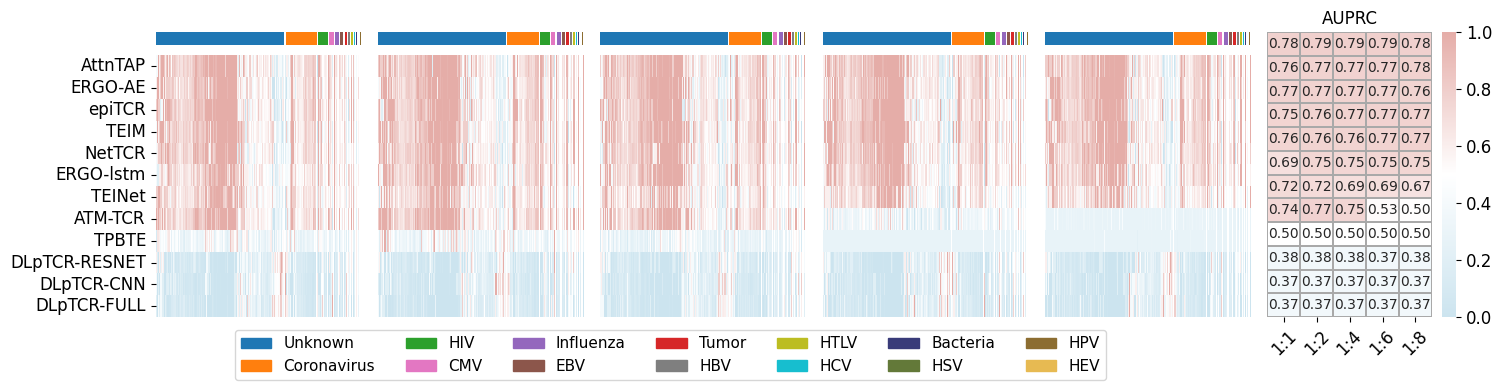

In [44]:
new_path = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/"
os.chdir(new_path)
data=pd.read_csv("./All_results/data/data2/unseen_test_antigen.csv")
data=data[['Epitope','antigen_species']]
data = data.rename(columns={'Epitope': 'epitope'})
epitope_counts = data.groupby('antigen_species')['epitope'].nunique()
antigen_unique = data.drop_duplicates(subset=['epitope', 'antigen_species'])

merged_df1_1,merged_df1_2,merged_df1_4,merged_df1_6,merged_df1_8,all_mean_df=Ratios('test/healthy')
combine_plots_in_row(merged_df1_1, merged_df1_2, merged_df1_4,merged_df1_6,merged_df1_8, antigen_unique, all_mean_df,
                      'C_test_unseen_healthy',(2.5, -0.05),7)


# D

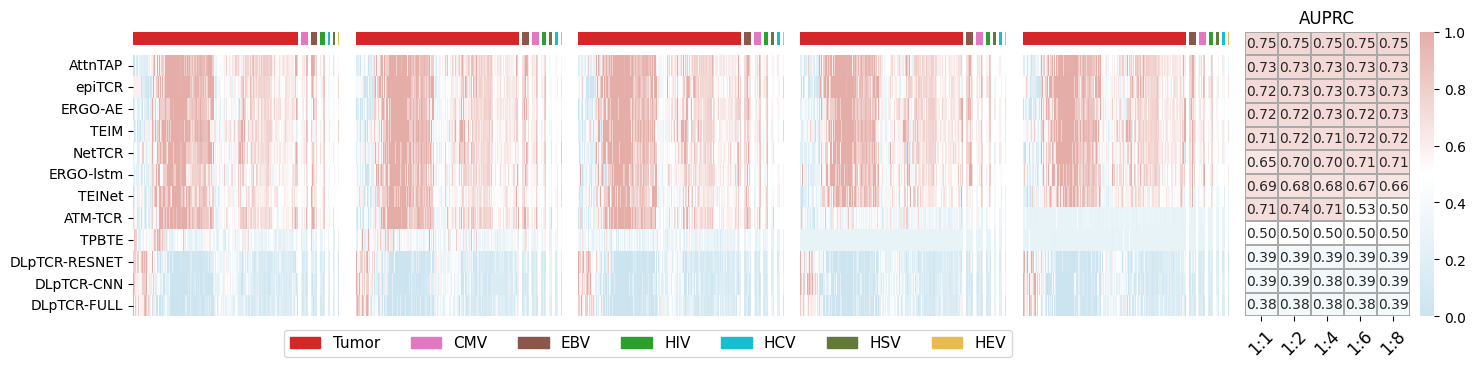

In [38]:
new_path = "/home/luyanping/data/TCR_epitope_prediction/Compare_models_same_data/"
os.chdir(new_path)
data=pd.read_csv("./All_results/data/data2/unseen_validation_raw_data.csv")
data=data[['epitope','antigen_species']]
epitope_counts = data.groupby('antigen_species')['epitope'].nunique()
antigen_unique = data.drop_duplicates(subset=['epitope', 'antigen_species'])
merged_df1_1,merged_df1_2,merged_df1_4,merged_df1_6,merged_df1_8,all_mean_df=Ratios('validation/healthy')
combine_plots_in_row(merged_df1_1, merged_df1_2, merged_df1_4,merged_df1_6,merged_df1_8, antigen_unique, all_mean_df,
                      'D_validation_unseen_healthy',(2.5, -0.05),7)
